# Low-Rank Structure in Gaussian Covariances

This notebook explores how low-rank changes in Gaussian coefficient matrices affect covariance structure.
The emphasis is on empirical covariance, eigenvalues, and matrix rank.

## Background

$$
x = W z + \varepsilon,\quad z \sim \mathcal{N}(0, I_k),\quad \varepsilon \sim \mathcal{N}(0, \sigma^2 I_d)
$$

$$
\Sigma = W W^\top + \sigma^2 I_d.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigvalsh

rng = np.random.default_rng(0)

In [2]:
d = 40
k = 8
sigma = 0.1
n = 1500

W0 = rng.normal(size=(d, k))
Sigma0 = W0 @ W0.T + sigma**2 * np.eye(d)

## Low-Rank vs Diffuse Coefficient Changes

In [3]:
rank_star = 2

B = rng.normal(size=(d, rank_star))
A = rng.normal(size=(rank_star, k))
DeltaW_lr = B @ A

D = rng.normal(size=(d, k))
DeltaW_dense = D / np.linalg.norm(D, 'fro') * np.linalg.norm(DeltaW_lr, 'fro')

In [4]:
def sample(W):
    z = rng.normal(size=(n, k))
    eps = sigma * rng.normal(size=(n, d))
    return z @ W.T + eps

S_lr = (sample(W0 + DeltaW_lr).T @ sample(W0 + DeltaW_lr)) / n
S_dense = (sample(W0 + DeltaW_dense).T @ sample(W0 + DeltaW_dense)) / n

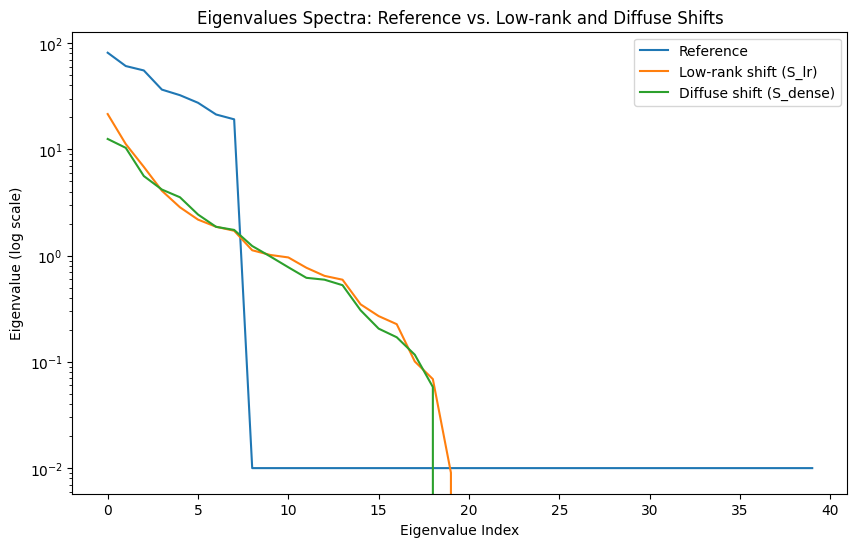

In [6]:
eig0 = eigvalsh(Sigma0)
eig_lr = eigvalsh(S_lr)
eig_dense = eigvalsh(S_dense)

# Step 1: Compute eigenvalues
eig0_desc =eig0[::-1]
eig_lr_desc = eig_lr[::-1]
eig_dense_desc = eig_dense[::-1]

# Step 2: Plot eigenvalues on log scale
plt.figure(figsize=(10, 6))
plt.semilogy(eig0_desc, label='Reference')
plt.semilogy(eig_lr_desc, label='Low-rank shift (S_lr)')
plt.semilogy(eig_dense_desc, label='Diffuse shift (S_dense)')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue (log scale)')
plt.title('Eigenvalues Spectra: Reference vs. Low-rank and Diffuse Shifts')
plt.legend()
plt.show()

# Step 3: Quantify "Significant Change"

In [7]:
threshold = 0.10  # 10%

rel_change_lr = np.abs(eig_lr_desc - eig0_desc) / np.maximum(np.abs(eig0_desc), 1e-12)
rel_change_dense = np.abs(eig_dense_desc - eig0_desc) / np.maximum(np.abs(eig0_desc), 1e-12)

num_sig_lr = np.sum(rel_change_lr > threshold)
num_sig_dense = np.sum(rel_change_dense > threshold)

print("Significant eigenvalue changes (>10%):")
print("Low-rank:", int(num_sig_lr))
print("Diffuse :", int(num_sig_dense))

Significant eigenvalue changes (>10%):
Low-rank: 39
Diffuse : 40


# Step 4: Interpretation

1. In the low-rank case, how many eigenvalues change substantially, and how does this number relate to the rank of the coefficient modification?

    Ans : In the low rank case, the 10 percent change crioterion indicates that 39 eigenvalues differ substantially drom those of the reference covariance. But, this large count is driven primarliy by eigenvalues near the noise floor, where small absolute changes produce large relative differences. Geometricaly, the meaningful changes are confined to only a small number of dominant eigenvalues. This behavior is consistent with the fact that the coefficient midification has low rank, that restricts the change in variance to a low-dimensional subspace of the data space. 

2. In the diffuse case, why are many eigenvalues affected, even though the overall magnitude of the change is the same?

    Ans: In the diffuse case, 40 eigenvallues change substancially because the coefficient modification is approximately full rank, allowing varinace to be redistributed across many independent directions. Even though the overall magnitude of the change is the same as in the low rank case. The diffuse modification spreads its effect across many geometric directions of variance, leading to widespread changes throughout the eigenvalue spectrum.

3. How do these observations illustrate the idea that matrix rank limits the number of variance directions that can change?

    Ans: These observations show that matrix rank limits the number of variance directiions that can change meaningfully. Eigenvalues represent the variance along orthogonal geometric directions of the data. A lo rank perturbation can significantly affect only a small number of these directions, while a high rank perturbation alters variance across many directions, producing bread changes in the covaraince spectrum. 